In [14]:
from dotenv import load_dotenv
import os, getpass

# Load environment variables from .env file
load_dotenv()

# Fetch the OpenAI API key
openai_api_key = os.getenv("OPENAI_API_KEY")

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


if openai_api_key:
    print("OpenAI API Key fetched successfully!")
else:
    _set_env("OPENAI_API_KEY")

OpenAI API Key fetched successfully!


In [15]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import MessagesState
import requests
import json

In [ ]:
# System message for context

# Function to extract C functions from C files via ChatGPT
def extract_functions(path: str, state: MessagesState):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with extracting C functions and their code from the provided C file.")
    # Fetch the file content from the provided link
    with open(path, 'r') as file:
        file_content = file.read()
    # Prepare the human message containing the file content
    human_msg = HumanMessage(content=f"Extract the different C functions from the following C file:\n\n{file_content}\n\nProvide a list of dictionaries where each dictionary contains the 'function_name' which is only the name of the function(remove any brackets or return parameters etc) and 'function_code'. Clean the response to not have anything other than the list of dictionaries in the output. The final output should be in json")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_extraction = ChatOpenAI(model="gpt-4o-mini")
    # Invoke the LLM using the provided system message and the state
    extracted_functions = llm_for_extraction.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return extracted_functions

# Example usage
state = MessagesState(messages=[])
link_to_file = "data/files/student_solution.c"  
# print(extract_functions(link_to_file, state).content.rstrip('```'.lstrip('```json')))
extracted_student_functions = json.loads(extract_functions(link_to_file, state).content.rstrip('```').lstrip('```json'))
link_to_file = "data/files/model_solution.c"  # Replace with the actual link to the file file
extracted_model_functions = json.loads(extract_functions(link_to_file, state).content.rstrip('```').lstrip('```json'))
extracted_model_functions

[{'function_name': 'createNewRecord',
  'function_code': 'record* createNewRecord(){\n    record* newRecord;\n    newRecord = (record*)malloc(sizeof(record));\n    newRecord->length = 0;\n    newRecord->header.node = NULL;\n    newRecord->tail.node = NULL;\n    return newRecord;\n}'},
 {'function_name': 'createNewNode',
  'function_code': 'LLNode* createNewNode(int value){\n    LLNode* newNode = (LLNode*)malloc(sizeof(LLNode));\n    newNode->ele = value;\n    newNode->next = NULL;\n    return newNode;\n}'},
 {'function_name': 'addNodeToRecord',
  'function_code': 'void addNodeToRecord(record* r, int value){\n    LLNode* newNode = createNewNode(value);\n    if(r->length == 0){\n        r->header.node = newNode;\n        r->tail.node = newNode;\n    } else{\n        r->tail.node->next = newNode;\n        r->tail.node = newNode; \n    }\n    r->length++;\n}'},
 {'function_name': 'new_bst',
  'function_code': 'BST* new_bst()\n{\n    BST* bst = (BST*)malloc(sizeof(BST));\n    bst->root = NU

In [17]:
extracted_model_functions

[{'function_name': 'createNewRecord',
  'function_code': 'record* createNewRecord(){\n    record* newRecord;\n    newRecord = (record*)malloc(sizeof(record));\n    newRecord->length = 0;\n    newRecord->header.node = NULL;\n    newRecord->tail.node = NULL;\n    return newRecord;\n}'},
 {'function_name': 'createNewNode',
  'function_code': 'LLNode* createNewNode(int value){\n    LLNode* newNode = (LLNode*)malloc(sizeof(LLNode));\n    newNode->ele = value;\n    newNode->next = NULL;\n    return newNode;\n}'},
 {'function_name': 'addNodeToRecord',
  'function_code': 'void addNodeToRecord(record* r, int value){\n    LLNode* newNode = createNewNode(value);\n    if(r->length == 0){\n        r->header.node = newNode;\n        r->tail.node = newNode;\n    } else{\n        r->tail.node->next = newNode;\n        r->tail.node = newNode; \n    }\n    r->length++;\n}'},
 {'function_name': 'new_bst',
  'function_code': 'BST* new_bst()\n{\n    BST* bst = (BST*)malloc(sizeof(BST));\n    bst->root = NU

In [ ]:
# System message for context


# Function to extract C functions from file content via ChatGPT
def extract_rubric(path: str, state: MessagesState):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with extracting rubric for each C function from the provided file content.")
    # Fetch the file content from the provided link
    with open(path, 'r') as file:
        file_content = file.read()
    
    # Prepare the human message containing the file content
    human_msg = HumanMessage(content=f"The following file contains rubric details for a C submission:\n\n{file_content}\n\nPlease extract all the sections in the rubric details.\n\nState the maximum possible marks as per the rubric. Provide a list of dictionaries where each dictionary contains the 'function_name' which is only the name of the function (remove any brackets or return parameters etc) and 'function_rubric' along with marks assigned to that function/functionality. Clean the response to not have anything other than the list of dictionaries in the output. Make sure the total marks should add up to 60 marks. The final output should in json")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_rubric_extraction = ChatOpenAI(model="gpt-4o-mini")
    # Invoke the LLM using the provided system message and the state
    extracted_rubric = llm_for_rubric_extraction.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return extracted_rubric

# Example usage
state = MessagesState(messages=[])
link_to_file = "data/files/rubric.md"  # Replace with the mdual link to the file file
extracted_rubric = json.loads(extract_rubric(link_to_file, state).content.rstrip('```').lstrip('```json'))

extracted_rubric

[{'function_name': 'readData',
  'function_rubric': 'Accurately reads the input file file1.txt and retrieves the number of records and corresponding data (5 marks). Correctly constructs a Binary Search Tree (BST) where each node stores a linked list, using the first integer in each line as the key (5 marks). Ensures that the BST adheres to the properties of binary search trees (5 marks). Verifies that each linked list is accurately inserted into the BST nodes (5 marks).',
  'marks': 20},
 {'function_name': 'sortLists',
  'function_rubric': 'Implements a sorting algorithm of choice to sort each linked list starting from the second node without modifying the first node (5 marks). Correctly sorts all linked lists stored in the BST nodes as per specifications (5 marks). Demonstrates logical and efficient sorting of the linked lists (4 marks). Handles edge cases such as empty lists or lists with a single node appropriately (3 marks).',
  'marks': 17},
 {'function_name': 'traverse',
  'funct

In [28]:

# Function to evaluate student code based on model code and rubric
def evaluate_student_code(student_code: str, model_code: str, rubric_content: str, state: MessagesState):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with evaluating a student's C code against a model solution based on a provided rubric. You will give numeric marks for each criterion and provide detailed comments, including correctness, errors, and suggestions for improvement.")

    # Prepare the human message containing the student code, model code, and rubric
    human_msg = HumanMessage(content=f"Here is a student's C code for the function:\n\n{student_code}\n\nAnd here is the correct model solution:\n\n{model_code}\n\nUsing the following rubric:\n\n{rubric_content}\n\n Now according to the rubric and taking model solution as the correct solution in consideration give numerical marks out of the maximum possible marks to that specific function_rubric in the student's C code submission. The final output should have functionality along with the marks allotted. Also give detailed comments, suggestions and improvements. The final output should in json")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_evaluation = ChatOpenAI(model="gpt-4o-mini")
    # Invoke the LLM using the system message and the state
    evaluation_response = llm_for_evaluation.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return evaluation_response

def initial_evaluator(extracted_student_functions, extracted_model_functions, extracted_rubric):
    state = MessagesState(messages=[])
    evaluations=evaluate_student_code(extracted_student_functions, extracted_model_functions, extracted_rubric, state)
    return evaluations

evaluations=initial_evaluator(extracted_student_functions, extracted_model_functions, extracted_rubric) 
evaluations = json.loads(evaluations.content.rstrip('```').lstrip('```json'))
evaluations

{'evaluation': [{'function_name': 'readData',
   'marks': 8,
   'comments': ['The function reads the input file, but it does not correctly retrieve the number of records and corresponding data as specified. The fscanf is not used correctly to parse multiple integers from the file.',
    "The construction of the BST is not entirely correct; for example, the relationships between nodes (keys) and their linked lists are not maintained properly. The BST should use the first integer as the key, but it seems to be using the linked list's head instead.",
    'The BST properties are not adequately verified. The insertion mechanism does not ensure that the BST properties are maintained.',
    'The insertion of linked lists into BST nodes is incorrect. The code attempts to insert integers instead of linked lists.'],
   'suggestions': ['Revise the file reading logic to properly parse multiple records.',
    'Ensure that nodes in the BST are inserted based on their key values properly.',
    'Impl

In [29]:

# Function to evaluate student code based on model code and rubric
def reevaluate_student_code(student_code: str, model_code: str, rubric_content: str, state: MessagesState):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with evaluating a student's C code against a model solution based on a provided rubric. You will give numeric marks for each criterion and provide detailed comments, including correctness, errors, and suggestions for improvement.")

    # Prepare the human message containing the student code, model code, and rubric
    human_msg = HumanMessage(content=f"Here is a student's C code for the function:\n\n{student_code}\n\nAnd here is the correct model solution:\n\n{model_code}\n\nUsing the following rubric:\n\n{rubric_content} and here is the prior evaluluation {prior_evaluation}\n\n Now according to the rubric and taking model solution as the correct solution in consideration recheck numerical marks given out of the maximum possible marks to that specific function_rubric in the student's C code submission. The final output should have functionality along with the marks allotted. Also give detailed comments, suggestions and improvements. The final output should in json")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_evaluation = ChatOpenAI(model="gpt-4o-mini")
    # Invoke the LLM using the system message and the state
    evaluation_response = llm_for_evaluation.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return evaluation_response

def reevaluator(extracted_student_functions, extracted_model_functions, extracted_rubric):
    state = MessagesState(messages=[])
    reevaluations=evaluate_student_code(extracted_student_functions, extracted_model_functions, extracted_rubric, state)
    return reevaluations

reevaluations=initial_evaluator(extracted_student_functions, extracted_model_functions, extracted_rubric) 
reevaluations = json.loads(reevaluations.content.rstrip('```').lstrip('```json'))
reevaluations

{'evaluation': {'readData': {'marks': 8,
   'comments': ['The function attempts to read from a file and create a BST, but it lacks the correct handling of the number of records and their corresponding data.',
    'The function does not correctly construct the BST, as it does not store each linked list in the nodes properly; it lacks the logic to use the first integer in each line as the key.',
    'The BST properties are not adhered to, and there is no mechanism to ensure that elements are inserted in the correct order.',
    'The function does not verify if each linked list is accurately inserted into the BST nodes; the logic for managing linked lists is flawed.'],
   'suggestions': ['Ensure that you read the number of records correctly and maintain the structure of the BST.',
    'Implement a clear insertion logic that respects the BST properties.',
    'Modify the logic to create linked lists and insert them into the BST nodes accordingly.']},
  'sortLists': {'marks': 5,
   'comment

In [ ]:
# #NEED TO MODIFY SLIGHTLY
# #Compilation and test cases feature

# import subprocess
# import os

# def compile_and_run_c_code(file_path: str):
#     """
#     Compile and run C code against hardcoded test cases.
#     :param file_path: Path to the C file (e.g., "/path/to/student_solution.c").
#     :return: Dictionary with test case results.
#     """
#     # Get the directory and file name
#     directory = os.path.dirname(files/student_solution.c)
#     file_name = os.path.basename(files/student_solution.c)
#     executable_name = file_name.replace(".c", "")

#     # Hardcoded test cases
#     test_cases = [
#         {
#             "input": "5\n27 5 89 9 61\n6 4 87 9 82 7 5\n3 9 5 4 75 5 82 7\n99 6 26 11 42 50 8\n91 3 6 22 5 45 8 71 85\n",
#             "expected_output": "3 4 5 5 7 9 75 82\n6 4 5 7 9 82 87\n27 5 9 61 89\n91 3 5 6 8 22 45 71 85\n99 6 8 11 26 42 50\n"
#         }
#     ]

#     try:
#         # Compile the C code
#         compile_cmd = ["gcc", file_name, "-o", executable_name]
#         compile_process = subprocess.run(compile_cmd, cwd=directory, capture_output=True, text=True)

#         # Check for compilation errors
#         if compile_process.returncode != 0:
#             return {"status": "compilation_error", "details": compile_process.stderr}

#         # Prepare to run test cases
#         test_results = {}
#         for idx, test_case in enumerate(test_cases):
#             input_data = test_case["input"]
#             expected_output = test_case["expected_output"].strip()

#             # Run the compiled executable with the input data
#             run_cmd = [f"./{executable_name}"]
#             run_process = subprocess.run(
#                 run_cmd, cwd=directory, input=input_data, capture_output=True, text=True
#             )
#             actual_output = run_process.stdout.strip()

#             # Compare the actual output with the expected output
#             if actual_output == expected_output:
#                 test_results[f"test_case_{idx + 1}"] = "passed"
#             else:
#                 test_results[f"test_case_{idx + 1}"] = {
#                     "status": "failed",
#                     "expected": expected_output,
#                     "actual": actual_output,
#                 }

#         return {"status": "success", "test_results": test_results}
#     except Exception as e:
#         return {"status": "error", "details": str(e)}

# # Example usage:
# file_path = "/data/files/student_solution.c"
# result = compile_and_run_c_code(file_path)
# print(result)


In [30]:
def extract_marks(evaluation):
    sys_msg = SystemMessage(content="You are a helpful assistant tasked with extracting stepwise markss from the given evaluation.")

    # Prepare the human message containing the student code, model code, and rubric
    human_msg = HumanMessage(content=f"Here is a student's C code evaluation:\n\n{evaluation}. Return a list of marks functionality wise")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_extraction = ChatOpenAI(model="gpt-4o-mini")
    # Invoke the LLM using the system message and the state
    extraction_response = llm_for_extraction.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return extraction_response

def extract_marks_for_all_functions(evaluations):
    marks=[]
    marks = extract_marks(reevaluations)
            
    return marks
    
list_of_marks=json.loads(extract_marks_for_all_functions(evaluations).content.rstrip('```').lstrip('```json'))

In [31]:
list_of_marks

[{'function_name': 'readData',
  'function_rubric': 'Building the Binary Search Tree',
  'marks': 8},
 {'function_name': 'sortLists',
  'function_rubric': 'Sorting the Linked Lists',
  'marks': 5},
 {'function_name': 'traverse',
  'function_rubric': 'In-order Traversal and File Writing',
  'marks': 10},
 {'function_name': 'main', 'function_rubric': 'Main Function', 'marks': 3},
 {'function_name': 'Code Quality and Style',
  'function_rubric': 'Code Quality and Style',
  'marks': 4},
 {'function_name': 'Adherence to Assignment Constraints',
  'function_rubric': 'Adherence to Assignment Constraints',
  'marks': 1}]

In [32]:
def sum_marks(list_of_marks):
    sys_msg = SystemMessage(content="You are a helpful assistant who does maths as an expert")

    # Prepare the human message containing the student code, model code, and rubric
    human_msg = HumanMessage(content=f"Here is a list of marks:\n\n{list_of_marks}. Return the total score by adding all these marks in a json")

    # Update the state with the human message
    state["messages"].append(human_msg)
    llm_for_extraction = ChatOpenAI(model="gpt-4o-mini")
    # Invoke the LLM using the system message and the state
    extraction_response = llm_for_extraction.invoke([sys_msg] + state["messages"])
    
    # Parse the AI response (assuming it returns the correct format directly)
    return extraction_response

def extract_total_marks(list_of_marks):
    marks = sum_marks(list_of_marks)  
    return marks
    
marks=json.loads(extract_total_marks(list_of_marks).content.rstrip('```').lstrip('```json'))
marks

{'total_score': 31}

In [33]:
def generate_comprehensive_report(evaluation_outputs: list, state: MessagesState):
    # System message for the LLM to guide the report generation process
    sys_msg = SystemMessage(content="You are a skilled assistant tasked with generating a comprehensive evaluation report based on multiple evaluation outputs. Consolidate markss, identify common strengths and weaknesses, and provide actionable suggestions for improvement. Ensure the report is well-organized and includes an overall summary.")

    # Prepare the human message with the combined evaluations
    human_msg = HumanMessage(content=f"Here is the final evaluation:\n\n{evaluation_outputs}\n\nGenerate a single comprehensive report for the student using the final evaluations including summary of marks, and detailed comments and suggestions for improvement on each functionality.")

    # Update the state with the human message
    state["messages"].append(human_msg)

    # Invoke the LLM to generate the comprehensive report
    llm_for_report = ChatOpenAI(model="gpt-4o-mini")
    report_response = llm_for_report.invoke([sys_msg] + state["messages"])

    # Return the generated report
    return report_response

report = generate_comprehensive_report(reevaluations, MessagesState(messages=[])).content
report

'# Comprehensive Evaluation Report\n\n## Overall Summary\nThe evaluation of the provided functions indicates several areas requiring improvement, particularly in the implementation of data structures and algorithms. The total marks achieved are 31 out of a maximum of 70, reflecting significant deficiencies in multiple areas. The analysis reveals both common strengths and weaknesses across the various functions assessed. Below is a detailed breakdown of performance per functionality along with actionable suggestions for improvement.\n\n---\n\n### 1. Read Data\n- **Marks:** 8/20\n- **Comments:**\n  - The function attempts to read from a file and create a Binary Search Tree (BST), but it lacks proper handling of the number of records and their corresponding data.\n  - The BST construction is flawed; the logic to utilize the first integer in each line as the key is absent.\n  - Adherence to BST properties is lacking, and there is no mechanism to ensure elements are inserted in the correct 

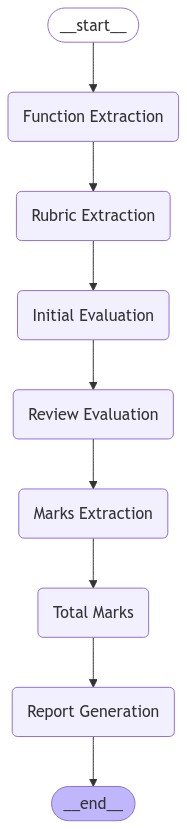

In [36]:

from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
# builder.add_node("assistant", assistant)
# builder.add_node("tools", ToolNode(tools))


builder.add_node("Function Extraction", extract_functions )
builder.add_node("Rubric Extraction", extract_rubric)
builder.add_node("Initial Evaluation", initial_evaluator)
builder.add_node("Review Evaluation", reevaluator)
builder.add_node("Marks Extraction", extract_marks_for_all_functions)
builder.add_node("Total Marks", sum_marks)
builder.add_node("Report Generation", sum_marks)

builder.add_edge(START, "Function Extraction")

builder.add_edge("Function Extraction", "Rubric Extraction")

builder.add_edge("Rubric Extraction", "Initial Evaluation")

builder.add_edge("Initial Evaluation", "Review Evaluation")

builder.add_edge("Review Evaluation", "Marks Extraction")

builder.add_edge("Marks Extraction", "Total Marks")

builder.add_edge("Total Marks", "Report Generation")

builder.add_edge("Report Generation", END)

# Define edges: these determine how the control flow moves
# builder.add_edge(START, "assistant")
# builder.add_conditional_edges(
#     "assistant",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))